In [1]:
import pandas as pd
import matplotlib.pyplot as plt  # Biblioteca Matplotlib
import seaborn as sns

In [2]:
df_log = pd.read_csv('admin_events.csv', delimiter= ',') #, names= ['level','Date','Source','EventID','Task','Category'])
df_log

,Level,Date and Time,Source,Event ID,Task,Category
0,Warning,1/2/2023 10:35:43 AM,Microsoft-Windows-DistributedCOM,10016,None,The application-specific permission settings d...
1,Warning,1/2/2023 10:30:28 AM,Microsoft-Windows-DistributedCOM,10016,None,The application-specific permission settings d...
2,Warning,1/2/2023 10:06:23 AM,Microsoft-Windows-DistributedCOM,10016,None,The application-specific permission settings d...
3,Warning,1/2/2023 10:00:04 AM,Microsoft-Windows-DistributedCOM,10016,None,The application-specific permission settings d...
4,Warning,1/2/2023 10:00:04 AM,Microsoft-Windows-DistributedCOM,10016,None,The application-specific permission settings d...
...,...,...,...,...,...,...
1551,Warning,12/25/2022 11:50:38 PM,LsaSrv,6155,None,LSA package is not signed as expected. This ca...
1552,Warning,12/25/2022 11:50:38 PM,LsaSrv,6155,None,LSA package is not signed as expected. This ca...
1553,Warning,12/25/2022 11:50:38 PM,Microsoft-Windows-Wininit,15,None,Credential Guard and/or VBS Key Isolation are ...
1554,Warning,12/25/2022 11:50:36 PM,Microsoft-Windows-Kernel-PnP,219,(212),The driver \Driver\WUDFRd failed to load for t...


In [3]:
df_log.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1556 entries, 0 to 1555
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Level          1556 non-null   object
 1   Date and Time  1556 non-null   object
 2   Source         1556 non-null   object
 3   Event ID       1556 non-null   int64 
 4   Task           1556 non-null   object
 5   Category       1556 non-null   object
dtypes: int64(1), object(5)
memory usage: 73.1+ KB


## Nosso dataframe é dividido em 2 caracteristicas: 'Warning' e 'Error'. Abaixo podemos visualizar a sua distribuição:

In [4]:
df_log['Level'].value_counts()

Warning    1170
Error       386
Name: Level, dtype: int64

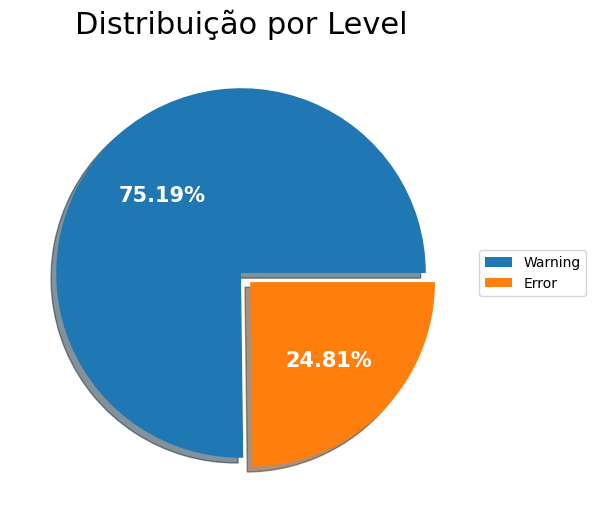


 As operações Warning representam 75.1928% do dataset, 
 e as operações Error representam 24.8072% do dataset.




In [5]:
df_tipo_level = df_log['Level'].value_counts()
fig,ax = plt.subplots(figsize=(6,6), subplot_kw=dict(aspect='equal'))
level_data = df_tipo_level.values
legenda_lvl = df_tipo_level.index


wedges,texts,autotexts = ax.pie(level_data, autopct='%0.2f%%',textprops=dict(color='w'), explode=(0,0.07), shadow = True)

ax.legend(wedges,['Warning','Error'],
          loc='center left',
          fontsize=10,
          bbox_to_anchor=(1,0,0.5,1))

plt.setp(autotexts, size=15,weight='bold')
ax.set_title('Distribuição por Level', fontsize=22)

plt.show()

print("\n As operações Warning representam {:.4f}% do dataset,".format((df_log['Level'].value_counts()[0] / df_log.shape[0]) * 100), "\n e as operações Error representam {:.4f}% do dataset.\n".format((df_log['Level'].value_counts()[1] / df_log.shape[0]) * 100))
print()

## Source  - Ocorrências por categoria (Warning e Error)

<AxesSubplot: xlabel='N_ocorrencias', ylabel='Source'>

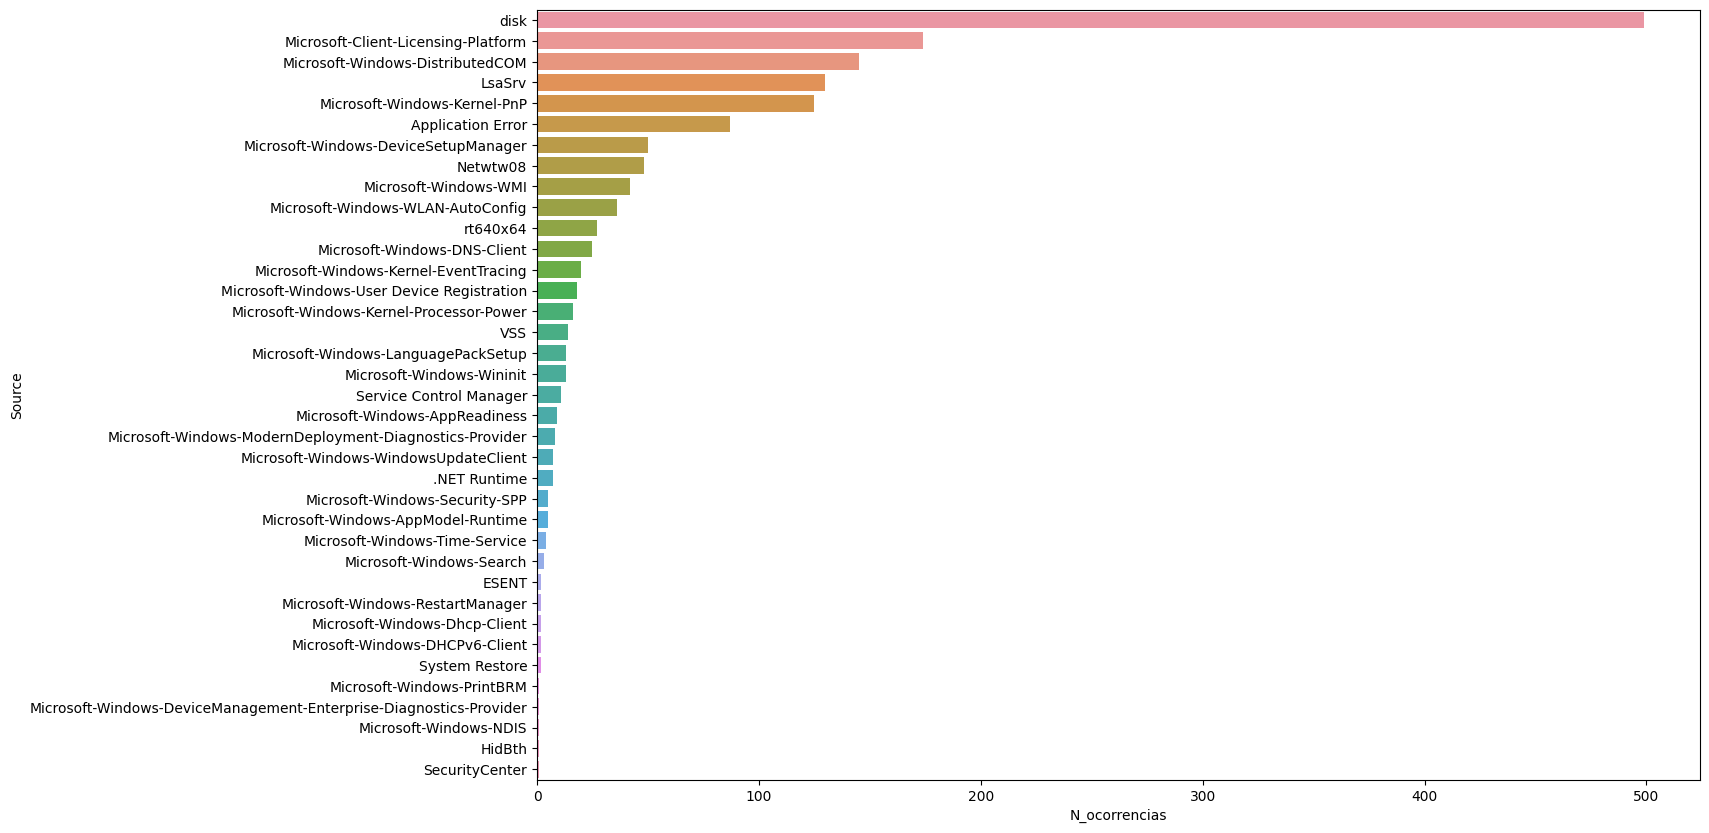

In [6]:
source_df = df_log['Source'].value_counts().to_frame().reset_index().rename(columns={'Source': 'N_ocorrencias', 'index':'Source'})
fig,ax = plt.subplots(figsize=(15,10))
sns.barplot(y='Source',x= 'N_ocorrencias', data=source_df)


## Source Warning - Ocorrências por categoria (Warning)

In [53]:
sourc_warn = df_log[df_log['Level']=='Warning'].value_counts().to_frame().reset_index().groupby('Source').sum().reset_index().rename(columns={0:'n_ocorrencias'}).drop(columns='Event ID')
sourc_warn

C:\Users\ozeas\AppData\Local\Temp\ipykernel_9860\377632374.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sourc_warn = df_log[df_log['Level']=='Warning'].value_counts().to_frame().reset_index().groupby('Source').sum().reset_index().rename(columns={0:'n_ocorrencias'}).drop(columns='Event ID')


,Source,n_ocorrencias
0,HidBth,1
1,LsaSrv,130
2,Microsoft-Windows-DNS-Client,25
3,Microsoft-Windows-DeviceSetupManager,46
4,Microsoft-Windows-Dhcp-Client,1
5,Microsoft-Windows-DistributedCOM,119
6,Microsoft-Windows-Kernel-EventTracing,11
7,Microsoft-Windows-Kernel-PnP,125
8,Microsoft-Windows-Kernel-Processor-Power,16
9,Microsoft-Windows-ModernDeployment-Diagnostics...,7


## Source Error - Ocorrências por categoria (Error)

In [55]:
sourc_err = df_log[df_log['Level']=='Error'].value_counts().to_frame().reset_index().groupby('Source').sum().reset_index().rename(columns={0:'n_ocorrencias'}).drop(columns='Event ID')
sourc_err

C:\Users\ozeas\AppData\Local\Temp\ipykernel_9860\211135087.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sourc_err = df_log[df_log['Level']=='Error'].value_counts().to_frame().reset_index().groupby('Source').sum().reset_index().rename(columns={0:'n_ocorrencias'}).drop(columns='Event ID')


,Source,n_ocorrencias
0,.NET Runtime,7
1,Application Error,87
2,ESENT,2
3,Microsoft-Client-Licensing-Platform,174
4,Microsoft-Windows-AppModel-Runtime,5
5,Microsoft-Windows-AppReadiness,9
6,Microsoft-Windows-DHCPv6-Client,2
7,Microsoft-Windows-DeviceManagement-Enterprise-...,1
8,Microsoft-Windows-DeviceSetupManager,4
9,Microsoft-Windows-Dhcp-Client,1


## Falhas de disco

In [9]:
porc_Max_source = (df_log['Source'].value_counts()[0] / df_log.shape[0] ) *100
print(f'Nosso log apresenta grande quantidade de falhas em disco (', df_log['Source'].value_counts()[0], '), equivalente a ', porc_Max_source.round(2),'% de nossa base')

Nosso log apresenta grande quantidade de falhas em disco ( 499 ), equivalente a  32.07 % de nossa base


## No dia 30/12 o maior volume de registros foi registrado.

In [10]:
df_log['Date and Time'].value_counts()

12/30/2022 3:16:54 PM     368
12/30/2022 3:18:22 PM     129
12/25/2022 11:50:41 PM     87
12/25/2022 11:50:42 PM     87
12/25/2022 11:50:49 PM     85
                         ... 
1/1/2023 9:23:02 AM         1
1/1/2023 10:28:43 AM        1
1/1/2023 10:29:31 AM        1
1/1/2023 10:29:56 AM        1
12/25/2022 11:50:35 PM      1
Name: Date and Time, Length: 535, dtype: int64

In [11]:
df_log['Event ID'].value_counts()

51       498
110      174
6155     130
10016    119
225       87
        ... 
1023       1
11         1
7009       1
7000       1
7001       1
Name: Event ID, Length: 68, dtype: int64

In [12]:
df_log['Task'].value_counts()

None                                 1244
Application Crashing Events            87
(223)                                  87
(212)                                  38
(1014)                                 25
(7)                                    16
Removing language pack                 13
Logging                                11
Session                                 9
Windows Update Agent                    7
Address Configuration State Event       4
(23)                                    4
(1)                                     3
Logging/Recovery                        2
Gatherer                                2
(6)                                     2
Backup                                  1
Search service                          1
Name: Task, dtype: int64

In [13]:
df_log['Category'].value_counts()

An error was detected on device \Device\Harddisk1\DR3 during a paging operation.                                                                                                                                                                                                                                                                                                                                                                                                                                                 369
License install failed for license type: 1\r\nResult code: 0xC03F6601                                                                                                                                                                                                                                                                                                                                                                                                                              

### 48% dos dados disponibilizados são duplicados:

In [14]:
df_log.duplicated().sum()/df_log.shape[0]

0.4787917737789203